In [65]:
import random
import networkx as nx
import matplotlib.pyplot as plt

src = 'S'
dst = 'D'

In [84]:
# N: Number of relay nodes
def generate_network(N):
    def draw_graph(graph):
        nx.draw(graph, with_labels=True)
        plt.show()
        
    
    def random_edge(graph):
        '''
        Code modified from: https://stackoverflow.com/questions/42591549/add-and-delete-a-random-edge-in-networkx
        Create a new random edge in the graph.
        :param graph: networkx graph
        :return: networkx graph
        '''
        edges = list(graph.edges)
        nonedges = list(nx.non_edges(graph))

        # random edge choice
        chosen_edge = random.choice(edges)
        
        if chosen_edge[0] == src or chosen_edge[0] == dst:
            edge0 = chosen_edge[1]
            edge1 = chosen_edge[1]
        elif chosen_edge[1] == src or chosen_edge[1] == dst:
            edge0 = chosen_edge[0]
            edge1 = chosen_edge[0]
        else:
            edge0 = chosen_edge[0]
            edge1 = chosen_edge[1]

        chosen_nonedge = random.choice([x for x in nonedges if edge0 == x[0] or edge0 == x[1] 
                                                            or edge1 == x[0] or edge1 == x[1]])
        
        # add new edge as long as it's not directly from S to D
        if not (chosen_nonedge[0] == src and chosen_nonedge[1] == dst or 
                chosen_nonedge[0] == dst and chosen_nonedge[1] == src):
            graph.add_edge(chosen_nonedge[0], chosen_nonedge[1])

        return graph

    nodes = list(range(1, N+1))

    
    G = nx.complete_graph(nodes)
    G.add_nodes_from([src, dst])
    
    e1 = (src, 1)
    e2 = (dst, N)
    G.add_edges_from([e1, e2])
    
    draw_graph(G)
        
    
#     while not nx.is_connected(G):
#         G = random_edge(G)
        
#     draw_graph(G)
    
    return G

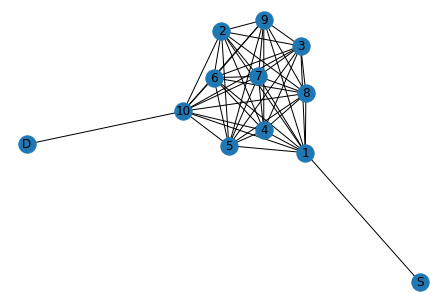

['S', 1, 10, 'D']


In [85]:
G = generate_network(10)
P = nx.shortest_path(G, src, dst)
print(P)